# Analisis estadistico

In [1]:
!wget https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv

--2023-09-11 19:33:33--  https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1700 (1.7K) [text/plain]
Saving to: ‘mtcars.csv’

mtcars.csv          100%[===================>]   1.66K  --.-KB/s    in 0s      

2023-09-11 19:33:33 (32.5 MB/s) - ‘mtcars.csv’ saved [1700/1700]



In [2]:
from pandas import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
bins = 10

In [3]:
cars = pd.read_csv('/content/mtcars.csv')
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
cars.tail()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [6]:
cars.isna().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

## Estadistico de tendencia central y de dispersion

In [7]:
cars.disp.mean()

230.72187499999998

In [8]:
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


<Axes: >

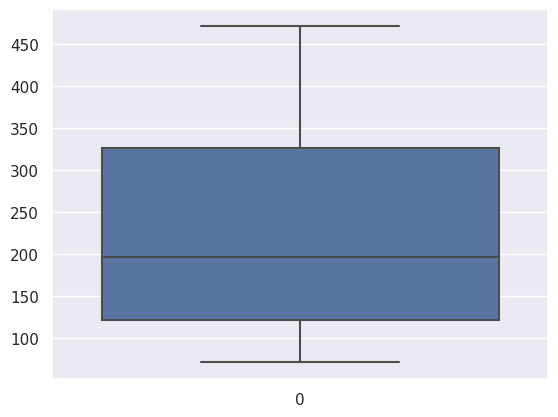

In [9]:
sns.boxplot(cars['disp'])

<Axes: xlabel='disp', ylabel='Count'>

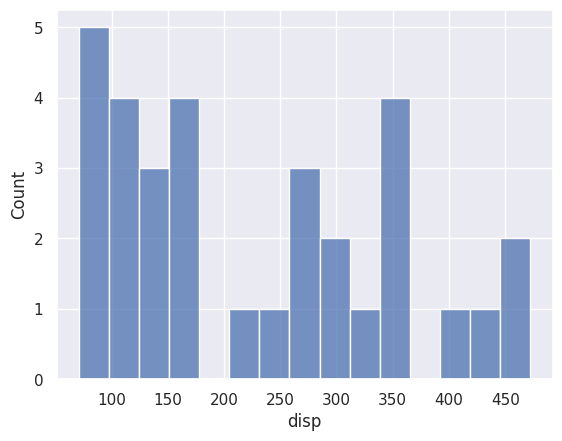

In [10]:
sns.histplot(cars['disp'],bins=15)

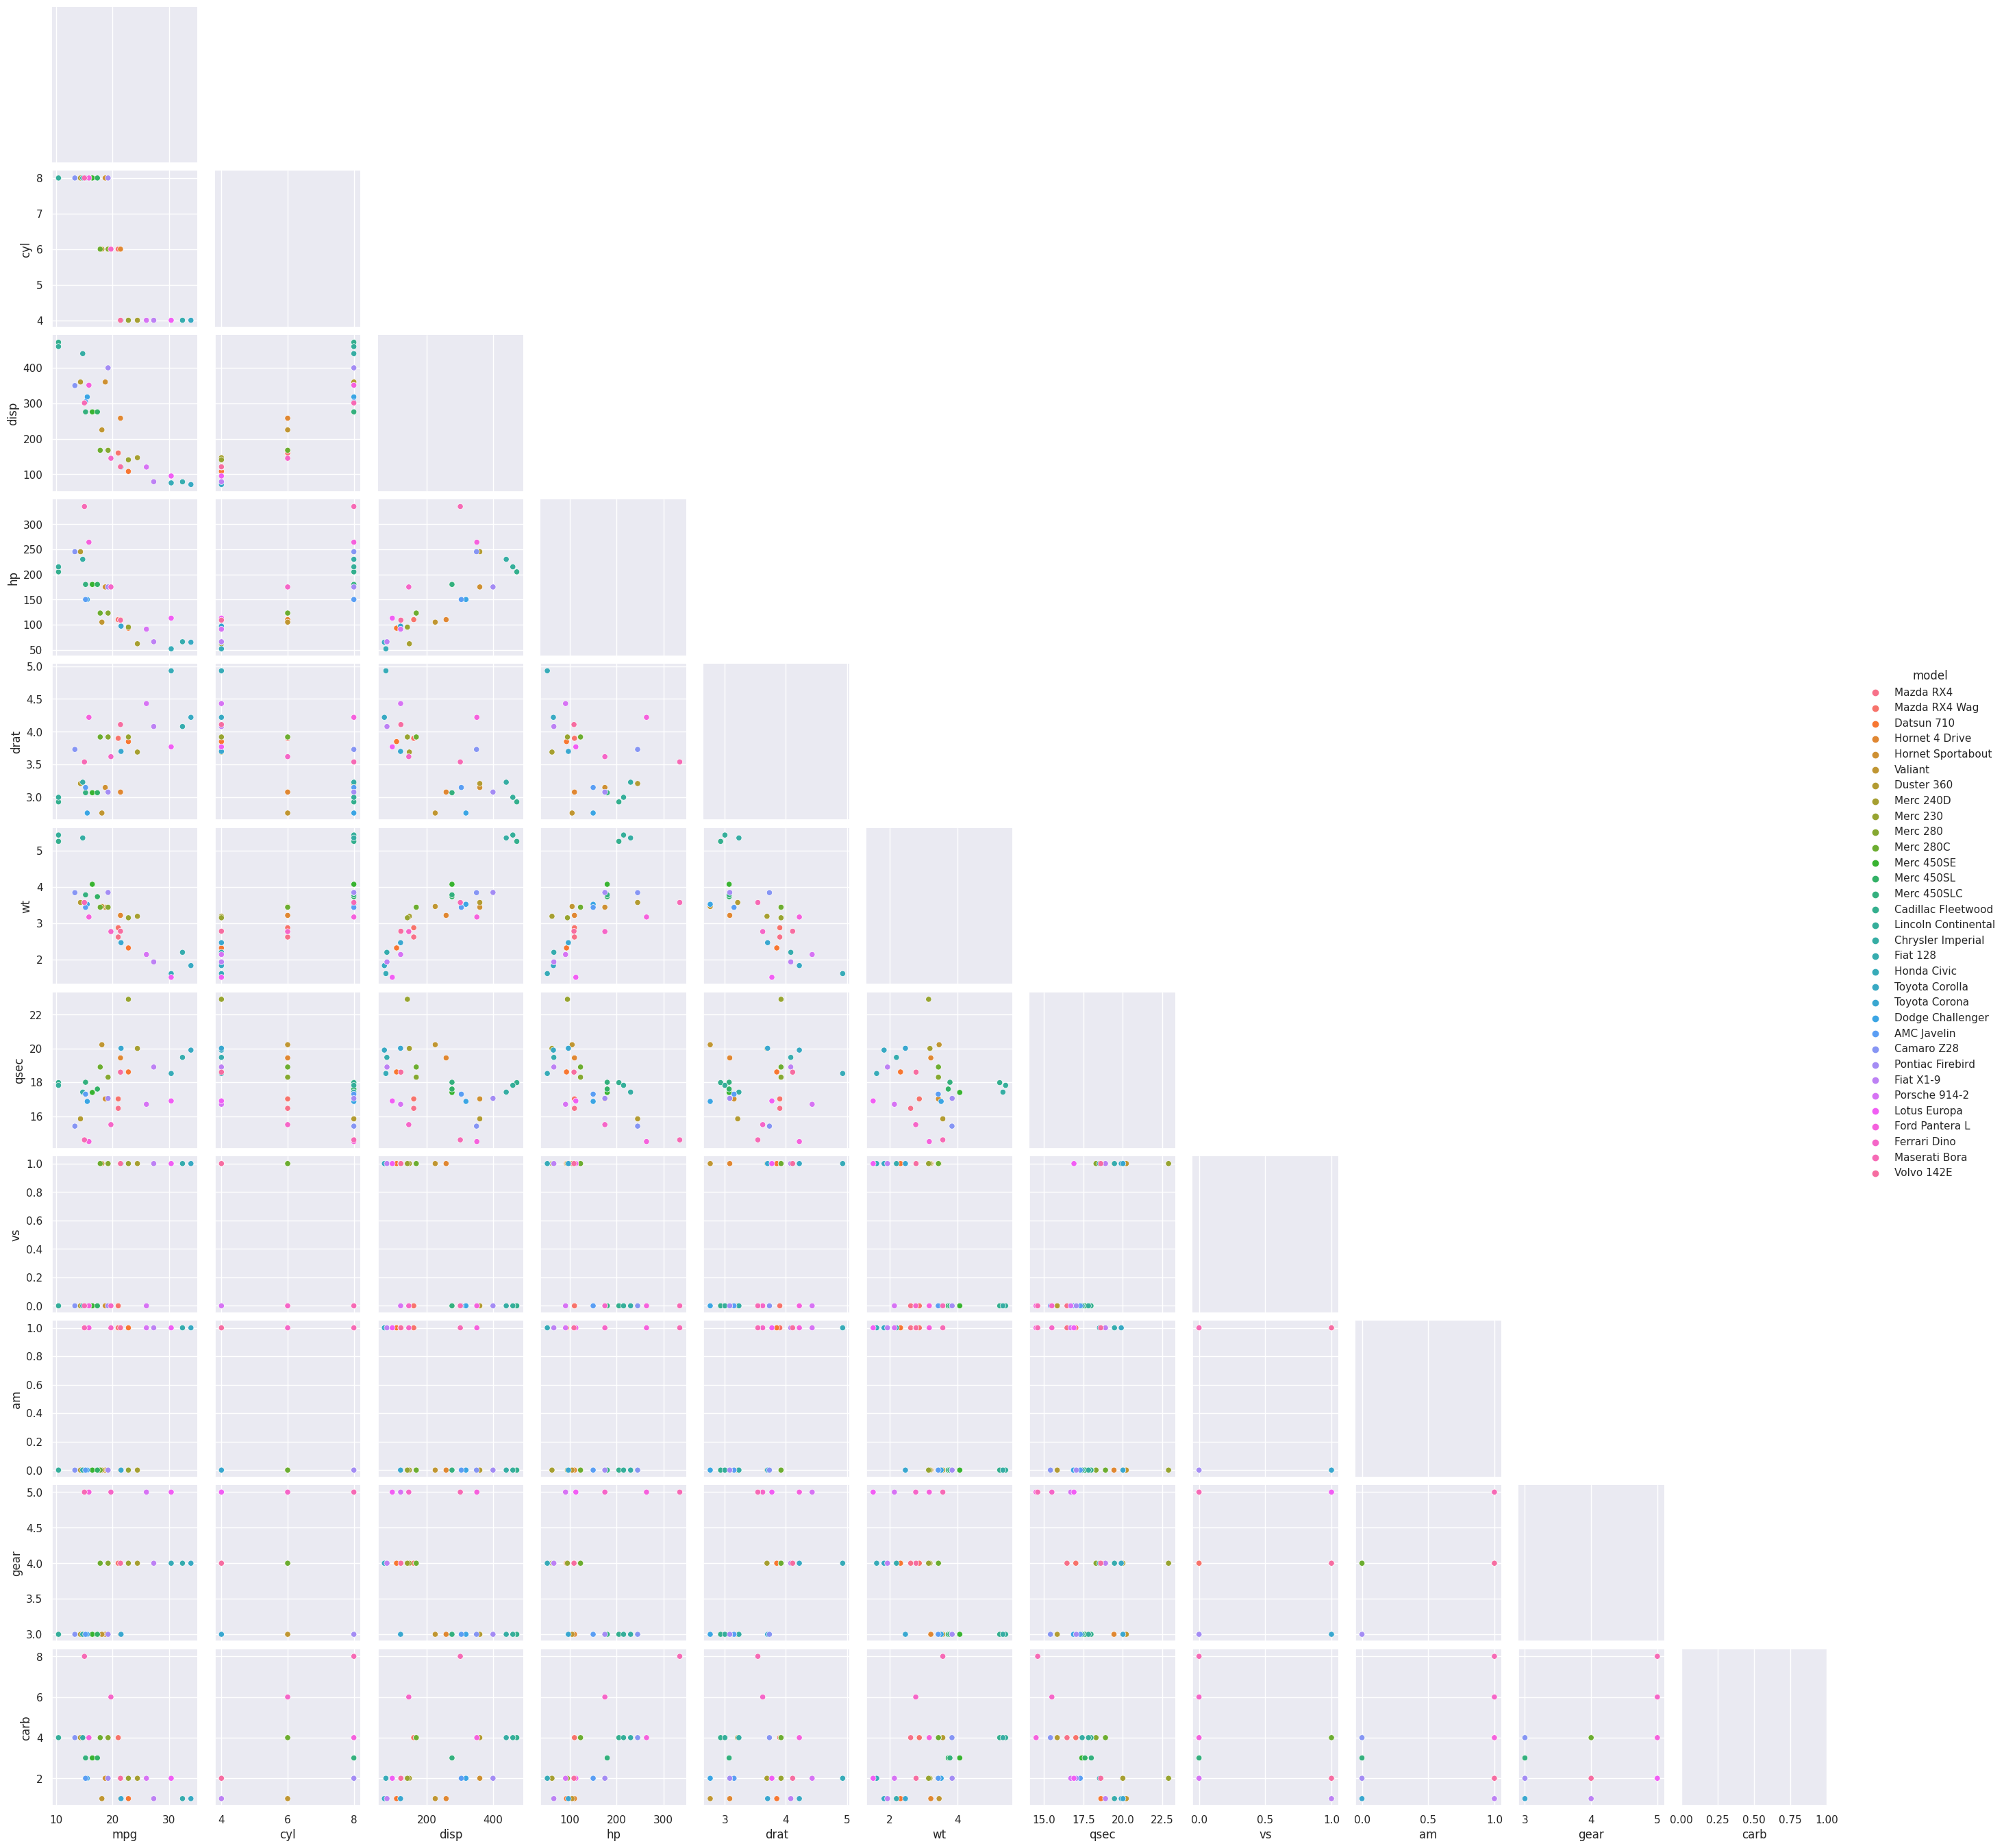

In [11]:
sns.pairplot(cars,hue='model', corner=True);

## Construimos un dataframe para realizar un analisis predictivo

Los pasos son los siguientes:

1. Observar el comportamiento de dichas variables
2. Observar numericamente si las variables siguen una distribucion normal
  - Shapiro  Wilk es el test de `normalidad` por excelencia
  - Kolmogorov Smirnov es un test de distribuciones a `especificar`
3. Realizar un test de correlacion bivariado:
  - Si los datos se distribuyen normalmente --> Pearson
  - Si los datos no se distribuyen normal y son mucho --> Kendall
  - Si no --> Spearman
4. Predictive power score: el poder predictivo que tienen las variables `regresoras` sobre la variable `target` u `objetivo`
5. Modelar con machine learning la relacion entre las variables de entrada o `features` para predecir el `target`
6. Observar el error


In [12]:
df = cars [['mpg','wt','disp','drat','hp']]
df.head(2)

,mpg,wt,disp,drat,hp
0,21.0,2.620,160.0,3.9,110
1,21.0,2.875,160.0,3.9,110


In [13]:
df.loc(0)

In [14]:
# Test de normalidad

from scipy import stats

for i in df.columns:
  print(f"\nVariable {i} {stats.shapiro(df[i])}")


Variable mpg ShapiroResult(statistic=0.9475648403167725, pvalue=0.1228824257850647)

Variable wt ShapiroResult(statistic=0.9432573914527893, pvalue=0.09265287965536118)

Variable disp ShapiroResult(statistic=0.9200125932693481, pvalue=0.020806454122066498)

Variable drat ShapiroResult(statistic=0.9458838701248169, pvalue=0.11006041616201401)

Variable hp ShapiroResult(statistic=0.9334192276000977, pvalue=0.048807866871356964)


<Axes: xlabel='drat', ylabel='Count'>

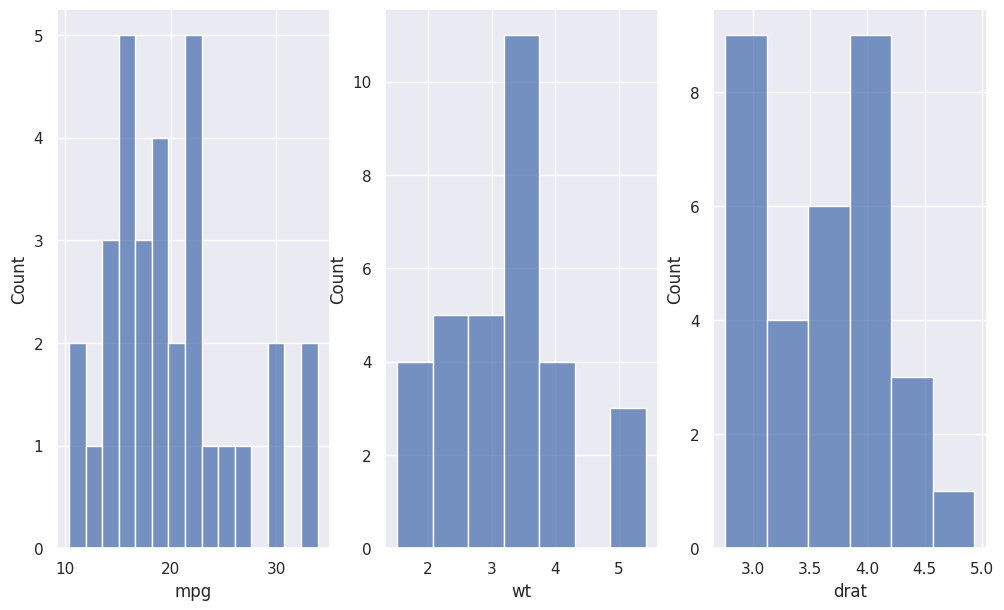

In [19]:
fig,axs= plt.subplots(1,3,figsize=(12,7))
sns.histplot(df['mpg'],bins = 15, ax=axs[0])
sns.histplot(df['wt'],ax=axs[1])
sns.histplot(df['drat'],ax=axs[2])

In [20]:
df.corr(method='spearman')

,mpg,wt,disp,drat,hp
mpg,1.000000,-0.886422,-0.908882,0.651455,-0.894665
wt,-0.886422,1.000000,0.897706,-0.750390,0.774677
disp,-0.908882,0.897706,1.000000,-0.683592,0.851043
drat,0.651455,-0.750390,-0.683592,1.000000,-0.520125
hp,-0.894665,0.774677,0.851043,-0.520125,1.000000


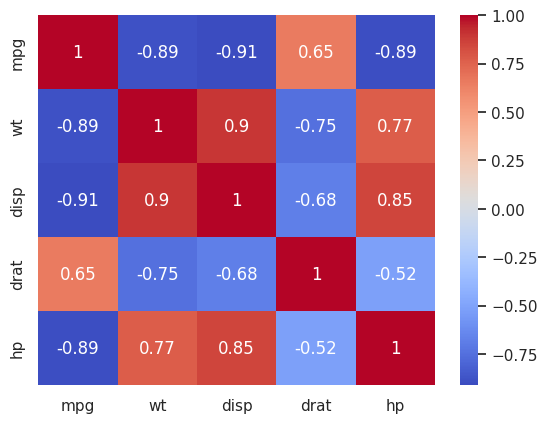

In [21]:
sns.heatmap(df.corr(method='spearman'),cmap='coolwarm',annot=True);

In [22]:
df = df.drop(columns='drat')
df.head(2)

,mpg,wt,disp,hp
0,21.0,2.620,160.0,110
1,21.0,2.875,160.0,110


In [23]:
#Power predition score
!pip install ppscore

  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13165 sha256=be8d4fe389f63a3c77b70fe59b8f14a38b741112d8b916a6933443ffa3e72dd7
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


In [24]:
import ppscore as pps

In [25]:
pps.predictors(df,'mpg')

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,wt,mpg,0.411216,regression,True,mean absolute error,4.634375,2.728646,DecisionTreeRegressor()
1,hp,mpg,0.364689,regression,True,mean absolute error,4.634375,2.944271,DecisionTreeRegressor()
2,disp,mpg,0.324005,regression,True,mean absolute error,4.634375,3.132812,DecisionTreeRegressor()


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [28]:
x = df.drop(columns='mpg')
y = df['mpg'].to_numpy()
print(f"Shape of x:  {x.shape} | Shape of Y {y.shape}")

Shape of x:  (32, 3) | Shape of Y (32,)


In [29]:
lr.fit(x,y)

LinearRegression()

In [30]:
#R2
lr.score(x,y)

0.8268361424946447

In [31]:
from sklearn import metrics as ms

In [32]:
y_pred = lr.predict(x)
mae = ms.mean_absolute_error(y_true = y, y_pred = y_pred)
mse = ms.mean_squared_error(y_true = y, y_pred = y_pred)
r2 = ms.r2_score(y_true = y, y_pred = y_pred)
rmse = np.sqrt(ms.mean_squared_error(y_true = y, y_pred = y_pred))

In [34]:
print(f"Mae: {mae}\nMse: {mse}\nR2: {r2}\nRmse: {rmse}")

Mae: 1.9070264019715115
Mse: 6.09345858501738
R2: 0.8268361424946447
Rmse: 2.468493181075731


In [35]:
df.describe()

,mpg,wt,disp,hp
count,32.000000,32.000000,32.000000,32.000000
mean,20.090625,3.217250,230.721875,146.687500
std,6.026948,0.978457,123.938694,68.562868
min,10.400000,1.513000,71.100000,52.000000
25%,15.425000,2.581250,120.825000,96.500000
50%,19.200000,3.325000,196.300000,123.000000
75%,22.800000,3.610000,326.000000,180.000000
max,33.900000,5.424000,472.000000,335.000000
